<a href="https://colab.research.google.com/github/Vicodethrone/Tour-de-Py/blob/main/Day_9_alarm_clock_wtih_GUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alarm clock

Đồng hồ báo thức dường như là một phần trong cuộc sống của mỗi người khi ta muốn thức dậy hay để phục vụ cho công việc (deadline). 

Ở bài này chúng ta sẽ sử dụng thư viện tkinter để thiết kế giao diện với ôn lại một số widget cơ bản

Ngoài ra chúng ta cũng sử dụng module time để có thể sử dụng strftime() (tìm hiểu thêm ở [đây](https://quantrimang.com/module-time-trong-python-165222#mcetoc_1dfpm2eda8)) và winsound để có chuông báo thức.

In [ ]:
import tkinter as tk
from tkinter import *
from tkinter import messagebox
import time, winsound

#Thiết kế giao diện

Đầu tiên tạo một hàm để chứa các widget, giao diện sau đó thiết kế grid layout với 4 hàng và 2 cột (row: 0 -> 3, column 0 -> 1):
*   hàng và cột đầu tiên (row = 0, column = 0) là label "Enter the time in hh:mm - " để người dùng có thể biết nội dung cần nhập
*   hàng đầu tiên, cột thứ hai (row = 0, column = 1) là single-form hay entry để người dùng nhập thông tin ứng với label cùng row
* hàng thứ hai, cột đầu tiên (row = 1, column = 0) label thứ 2 với nội dung "Enter the message of alarm - "
* hàng thứ hai, cột thứ hai (row = 1, column = 1) là single-form hay entry để người dùng nhập thông tin ứng với label cùng row
* hàng thứ ba, cột thứ hai (row = 2, column = 1) là button để submit, đặt chuông
* hàng thứ tư, cột đầu tiên (row = 3, column = 0) là label trống để hiển thị tin nhắn thông báo chờ đến báo thức và chuông báo thức kêu.





In [ ]:
def creatWidgets():
    #layout
    label1 = Label(root, text = "Enter the time in hh:mm - ")
    label1.grid(row = 0, column = 0, padx = 5, pady = 5)

    global entry1
    entry1 = Entry(root, width = 15)
    entry1.grid(row = 0, column = 1)

    label2 = Label(root, text="Enter the message of alarm - ")
    label2.grid(row=1, column=0, padx=5, pady=5)

    global entry2
    entry2 = Entry(root, width=15)
    entry2.grid(row=1, column=1)

    #button
    but = Button(root, text="Submit", width=10, command=submit)
    but.grid(row=2, column=1)

    global label3
    label3 = Label(root, text = "")
    label3.grid(row=3, column=0)

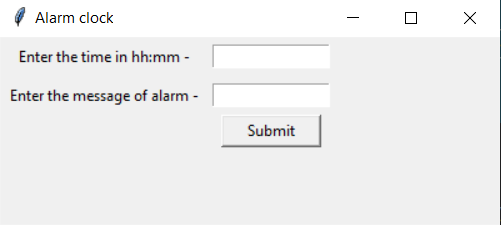

# Hàm thực hiện tính năng

* Ở mỗi hàm sẽ khao báo biến global để có thể sử dụng lại biến giữa nhiều hàm

*   hàm message1() để sau khi điền thời gian báo thức và tin nhắn cần thì sẽ in ra thời gian báo thức đang đếm và thời gian báo thức là bằng cách lấy string của entry1 (dòng form thứ nhất) bằn phương thức get() và show trên messagebox.
*   hàm submit() để áng với nút button submit ở trên nhằm thực hiện sự kiện khi clink: 
    * Lấy entry1 bằng phương thức get() lưu vào biến Alarmtime
    * chạy hàm message1()
    * khởi tạo biến currenttime để lưu thời gian hiện tại qua phương thức strftime() của module time
    * Lấy entry2 bằng phương thức get() vào biến alarmmessage
    * In Alarmtime
    * Tạo vòng lặp while để kiểm tra xem đã đến giờ báo thức chưa bằng việc liên tục gán currenttime = time.strftime("%H:%M") với điều kiện currenttime != Alarmtime.
    * Khi đến lúc currentime == Alarmtime, vòng lặp kết thúc chuyển sang câu lệnh điều kiện if: bật nhạc bằng phương thức Playsound của module winsound, sau đấy sử dụng showinfo của messagebox để show tin nhắn.



In [ ]:
def submit():

    global entry1, entry2, label3
    Alarmtime = entry1.get()
    message1()
    currenttime = time.strftime("%H:%%M")
    alarmmessage = entry2.get()
    print(f"The Alarm time is: {Alarmtime}")


    while Alarmtime != currenttime:
        currenttime = time.strftime("%H:%M")
        time.sleep(1)

    if Alarmtime == currenttime:
        print("Playing Alarm Sound.....")
        winsound.PlaySound("*", winsound.SND_ASYNC)
        label3.config(text="Alarm Sound Playing>>>>")
        messagebox.showinfo("Alarm Message", f"The message is: {alarmmessage}")

# Chạy chương trình

Chạy chương tình bằng thư viện tkinter thì ta phải tạo window, đặt tên cho chương trình, kích cỡ, chạy hàm, và cuối cùng là root.mainloop() để chạy chương trình

In [ ]:
root = tk.Tk() #creating window
root.title("Alarm clock") #creating title
root.geometry("400x150") #size
creatWidgets() #function 

root.mainloop() #run

Vậy là bạn đã làm xong chương trình báo thức siêu đơn giản rồi đấy, thật là dịp tốt để vừa ôn tập mà cũng vừa thêm tiện ích cho công việc, cuộc sống của bản thân. Bạn hoàn toàn có thể làm hơn thế này bằng việc thêm các extension để khiến sản phẩm trở nên ấn tượng và ôn tập nhiều hơn.